In [57]:
# 导入包
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

## 1.读入文本

In [58]:
data = pd.read_csv('spam.csv',delimiter=',',encoding = "ISO-8859-1")
data = data[['v1','v2']]
data['label'] = data.v1.map({'ham':0,'spam':1})
data

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


## 2. 划分数据集

In [59]:
from sklearn.model_selection import train_test_split
X = data['v2']
y = data['label']


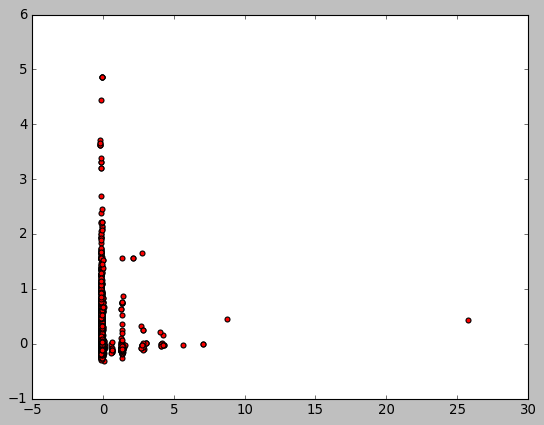

In [60]:
from  sklearn.decomposition import PCA
count_vector = CountVectorizer(stop_words='english')
X = count_vector.fit_transform(X)
X_array = X.toarray()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c='r')
plt.show()

## 3. 降维和处理文本

In [61]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_tain,y_test = train_test_split(X_pca,y)
classfier = LogisticRegression()
classfier.fit(X_train,y_tain)

LogisticRegression()

## 4. 模型评估

In [62]:
from sklearn.metrics import accuracy_score
y_pre = classfier.predict(X_test)
accuracy = accuracy_score(y_test,y_pre)
print(accuracy)

0.87724335965542


## 5. 寻找最优PCA降维维度

100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


The best demission is 9


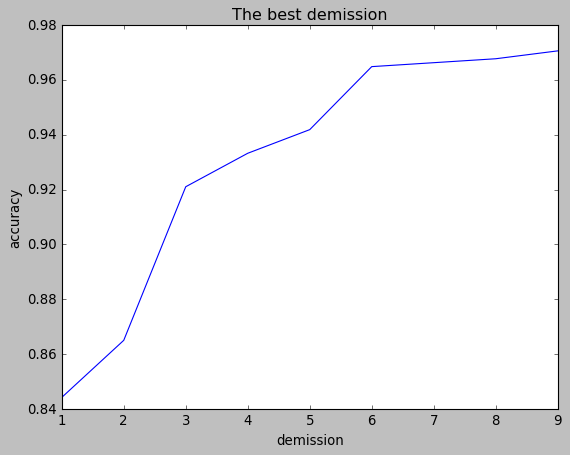

In [63]:
from tqdm.std import trange
maxIterrtion = 10
all_accuray = []
for i in trange(1,maxIterrtion):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_array)
    X_train,X_test,y_tain,y_test = train_test_split(X_pca,y)
    classfier = LogisticRegression()
    classfier.fit(X_train,y_tain)
    y_pre = classfier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pre)
    all_accuray.append(accuracy)
print(f'The best demission is {np.argmax(all_accuray) + 1}')
best_pca = PCA(n_components=np.argmax(all_accuray) + 1)
plt.plot(range(1,maxIterrtion),all_accuray)
plt.xlabel('demission')
plt.ylabel('accuracy')
plt.title('The best demission')
plt.show()


In [64]:
X_pca = pca.fit_transform(X_array)
X_train,X_test,y_tain,y_test = train_test_split(X_pca,y)
classfier = LogisticRegression()
classfier.fit(X_train,y_tain)
y_pre = classfier.predict(X_test)
accuracy = accuracy_score(y_test,y_pre)
print(f'The best demission accuracy is {accuracy}')

The best demission accuracy is 0.9605168700646087


## 6. 真实场景使用

In [65]:
test_sentence = ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C',
                 'Who are you',
                 'Hi how are you',
                 'I am fine',
                    'I am fine thank you',
                    'I am fine thank you and you',
                    'I will go to school tomorrow',
                    'Hi professor',
                    'I am a student']
t = np.copy(test_sentence)
test_sentence = count_vector.transform(test_sentence)
test_sentence = test_sentence.toarray()
test_sentence = best_pca.fit_transform(test_sentence)
funnyAns = classfier.predict(test_sentence)
for i in range(len(funnyAns)):
    if funnyAns[i] == 0:
        print(f'"{t[i]}" is not spam')
    else:
        print(f'"{t[i]}" is spam')
        

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C" is not spam
"Who are you" is spam
"Hi how are you" is not spam
"I am fine" is spam
"I am fine thank you" is spam
"I am fine thank you and you" is spam
"I will go to school tomorrow" is not spam
"Hi professor" is not spam
"I am a student" is not spam
